In [1]:
import pandas as pd
import numpy as np


In [2]:
data= pd.read_csv('./dataset/johnwise_cleaned.csv')
data.columns

Index(['mdr1_6_nbd_ori_total_dock_results_copy3.txt',
       '2hyd_nbd_1_ori_total_dock_results_copy3.txt',
       '3b5x_nbd_ori_total_dock_results_copy3.txt',
       '3b5z_nbd_1_ori_total_dock_results_copy3.txt',
       '3b5z_nbd_2_ori_total_dock_results_copy3.txt',
       'transition_1_nbd_ori_total_dock_results_copy3.txt',
       'transition_2_nbd_ori_total_dock_results_copy3.txt',
       '3b5x_dbd_ori_total_dock_results_copy3.txt',
       '3b5z_dbd_1_ori_total_dock_results_copy3.txt',
       '3b5z_dbd_2_ori_total_dock_results_copy3.txt',
       'mdr1_6_dbd_ori_total_dock_results_copy3.txt',
       '2hyd_dbd_1_ori_total_dock_results_copy3.txt',
       'transition_1_dbd_ori_total_dock_results_copy3.txt',
       'transition_2_dbd_ori_total_dock_results_copy3.txt', 'pgp_nbd_mean',
       'pgp_dbd_mean', 'pgp_dbd_mean2', 'pgp_ratio', 'mdr1_6_dbd-nbd',
       '2hyd_ratio_1', 'pgp_ratio_w_3b5xdbd', '3b5x_ratio', '3b5z_1_dbd-nbd',
       '3b5z_2_dbd-nbd', 'cLogP', 'cLogS', 'H-Acceptors', '

In [3]:
y = data['toxic'].values
x_data = data.drop(["toxic"], axis=1)
x = (x_data-np.min(x_data))/(np.max(x_data) -np.min(x_data))

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

In [5]:
data.info

<bound method DataFrame.info of      mdr1_6_nbd_ori_total_dock_results_copy3.txt  \
0                                   7.810800e-08   
1                                   8.713050e-09   
2                                   2.149430e-07   
3                                   2.838370e-08   
4                                   4.708490e-08   
..                                           ...   
126                                 2.030000e-08   
127                                 8.980000e-09   
128                                 9.250000e-09   
129                                 9.880000e-09   
130                                 1.160000e-08   

     2hyd_nbd_1_ori_total_dock_results_copy3.txt  \
0                                   1.094560e-07   
1                                   3.977500e-08   
2                                   4.220920e-07   
3                                   1.711020e-08   
4                                   7.810800e-08   
..                             

In [6]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("score :",dt.score(x_test,y_test))

score : 0.8148148148148148


In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
print("score :",clf.score(x_test,y_test))

score : 0.8888888888888888


[0.01703039 0.0248311  0.0148042  0.02285875 0.02051189 0.01554902
 0.03411988 0.01884553 0.02101707 0.01812541 0.0424713  0.02691432
 0.01855247 0.04267094 0.01699495 0.03112299 0.03072483 0.0145659
 0.0245898  0.01257211 0.01952499 0.02104312 0.01533673 0.02885153
 0.02241545 0.03367193 0.00703774 0.00929054 0.02972333 0.03370458
 0.04318678 0.01781734 0.02637235 0.01880945 0.02020145 0.01568632
 0.01128491 0.00089282 0.02027202 0.00551819 0.00723151 0.01099852
 0.01269768 0.01003076 0.02038532 0.         0.         0.
 0.01206503 0.00174357 0.         0.02459601 0.00292405 0.00321116
 0.00206078 0.00537472 0.00663736 0.0072701  0.00325901]


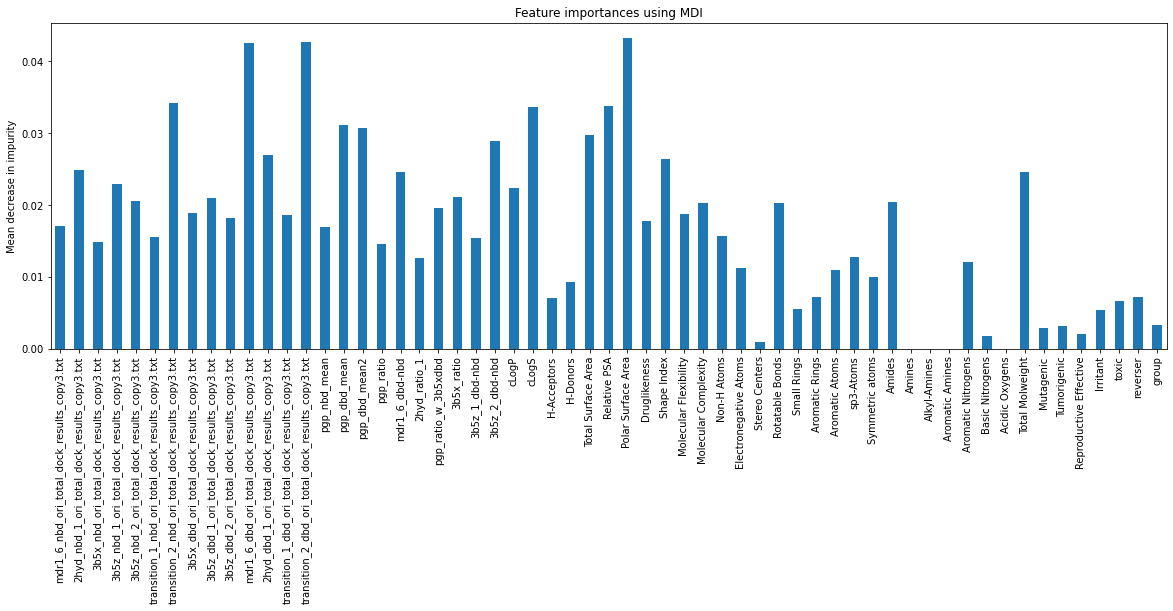

In [17]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
accuracies = []
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
score = rf.score(x_test, y_test)

importances = rf.feature_importances_
print(importances)


std = np.std([rf.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=data.columns[:-1])

fig, ax = plt.subplots(figsize=(20, 6))
forest_importances.plot.bar(yerr=std, ax=ax)

importances_matrix = np.asarray(forest_importances)
np.savetxt("importances_gini_matrix.csv", importances_matrix, delimiter=",")


ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()
plt.savefig('feature_importance_gini_impurity.png')
plt.show()

mdr1_6_nbd_ori_total_dock_results_copy3.txt          0.016667
2hyd_nbd_1_ori_total_dock_results_copy3.txt          0.003704
3b5x_nbd_ori_total_dock_results_copy3.txt            0.003704
3b5z_nbd_1_ori_total_dock_results_copy3.txt          0.009259
3b5z_nbd_2_ori_total_dock_results_copy3.txt          0.000000
transition_1_nbd_ori_total_dock_results_copy3.txt    0.000000
transition_2_nbd_ori_total_dock_results_copy3.txt    0.033333
3b5x_dbd_ori_total_dock_results_copy3.txt            0.029630
3b5z_dbd_1_ori_total_dock_results_copy3.txt          0.033333
3b5z_dbd_2_ori_total_dock_results_copy3.txt          0.000000
mdr1_6_dbd_ori_total_dock_results_copy3.txt          0.001852
2hyd_dbd_1_ori_total_dock_results_copy3.txt          0.003704
transition_1_dbd_ori_total_dock_results_copy3.txt    0.009259
transition_2_dbd_ori_total_dock_results_copy3.txt    0.022222
pgp_nbd_mean                                         0.000000
pgp_dbd_mean                                         0.016667
pgp_dbd_

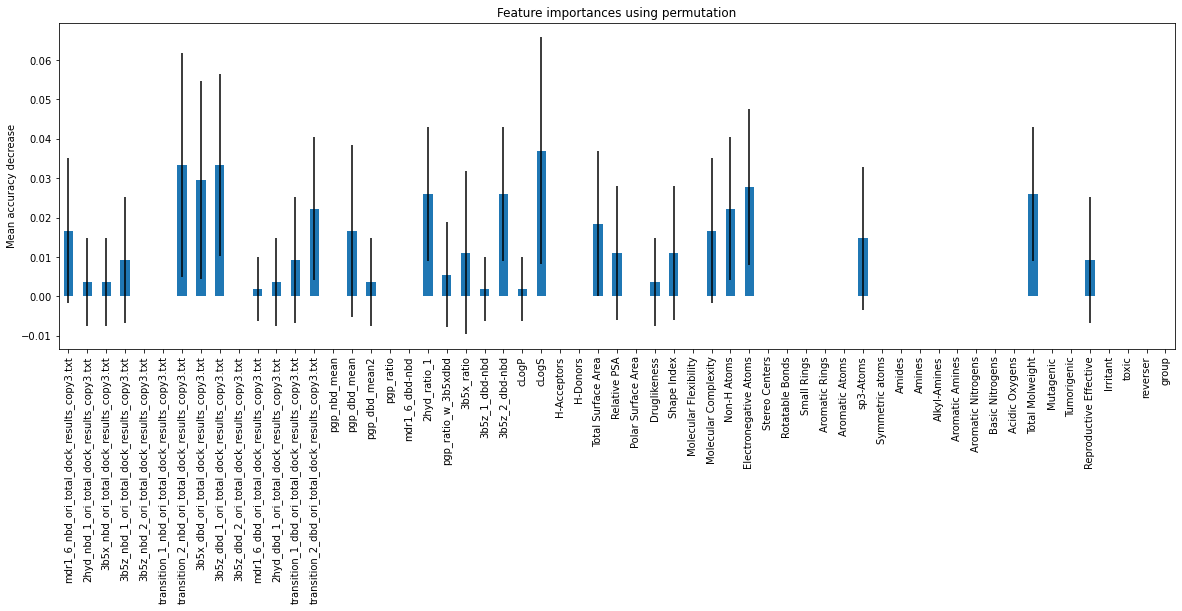

In [14]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
accuracies = []
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
score = rf.score(x_test, y_test)

result = permutation_importance(
    rf, x_test, y_test, n_repeats=20, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=data.columns[:-1])
fig, ax = plt.subplots(figsize=(20, 6))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
print(forest_importances)

importances_matrix = np.asarray(forest_importances)
np.savetxt("importances_matrix.csv", importances_matrix, delimiter=",")

ax.set_title("Feature importances using permutation")
ax.set_ylabel("Mean accuracy decrease")
plt.savefig('feature_importance_permu.png')
plt.show()

In [47]:
def proximityMatrix(model, X, normalize=True):      

    terminals = model.apply(X)
    nTrees = terminals.shape[1]

    a = terminals[:,0]
    proxMat = 1*np.equal.outer(a, a)

    for i in range(1, nTrees):
        a = terminals[:,i]
        proxMat += 1*np.equal.outer(a, a)

    if normalize:
        proxMat = proxMat / nTrees

    return proxMat   

proxMat = proximityMatrix(rf, x_train, normalize=True)

matrix = np.asarray(proxMat)
np.savetxt("matrix_normalized.csv", matrix, delimiter=",")

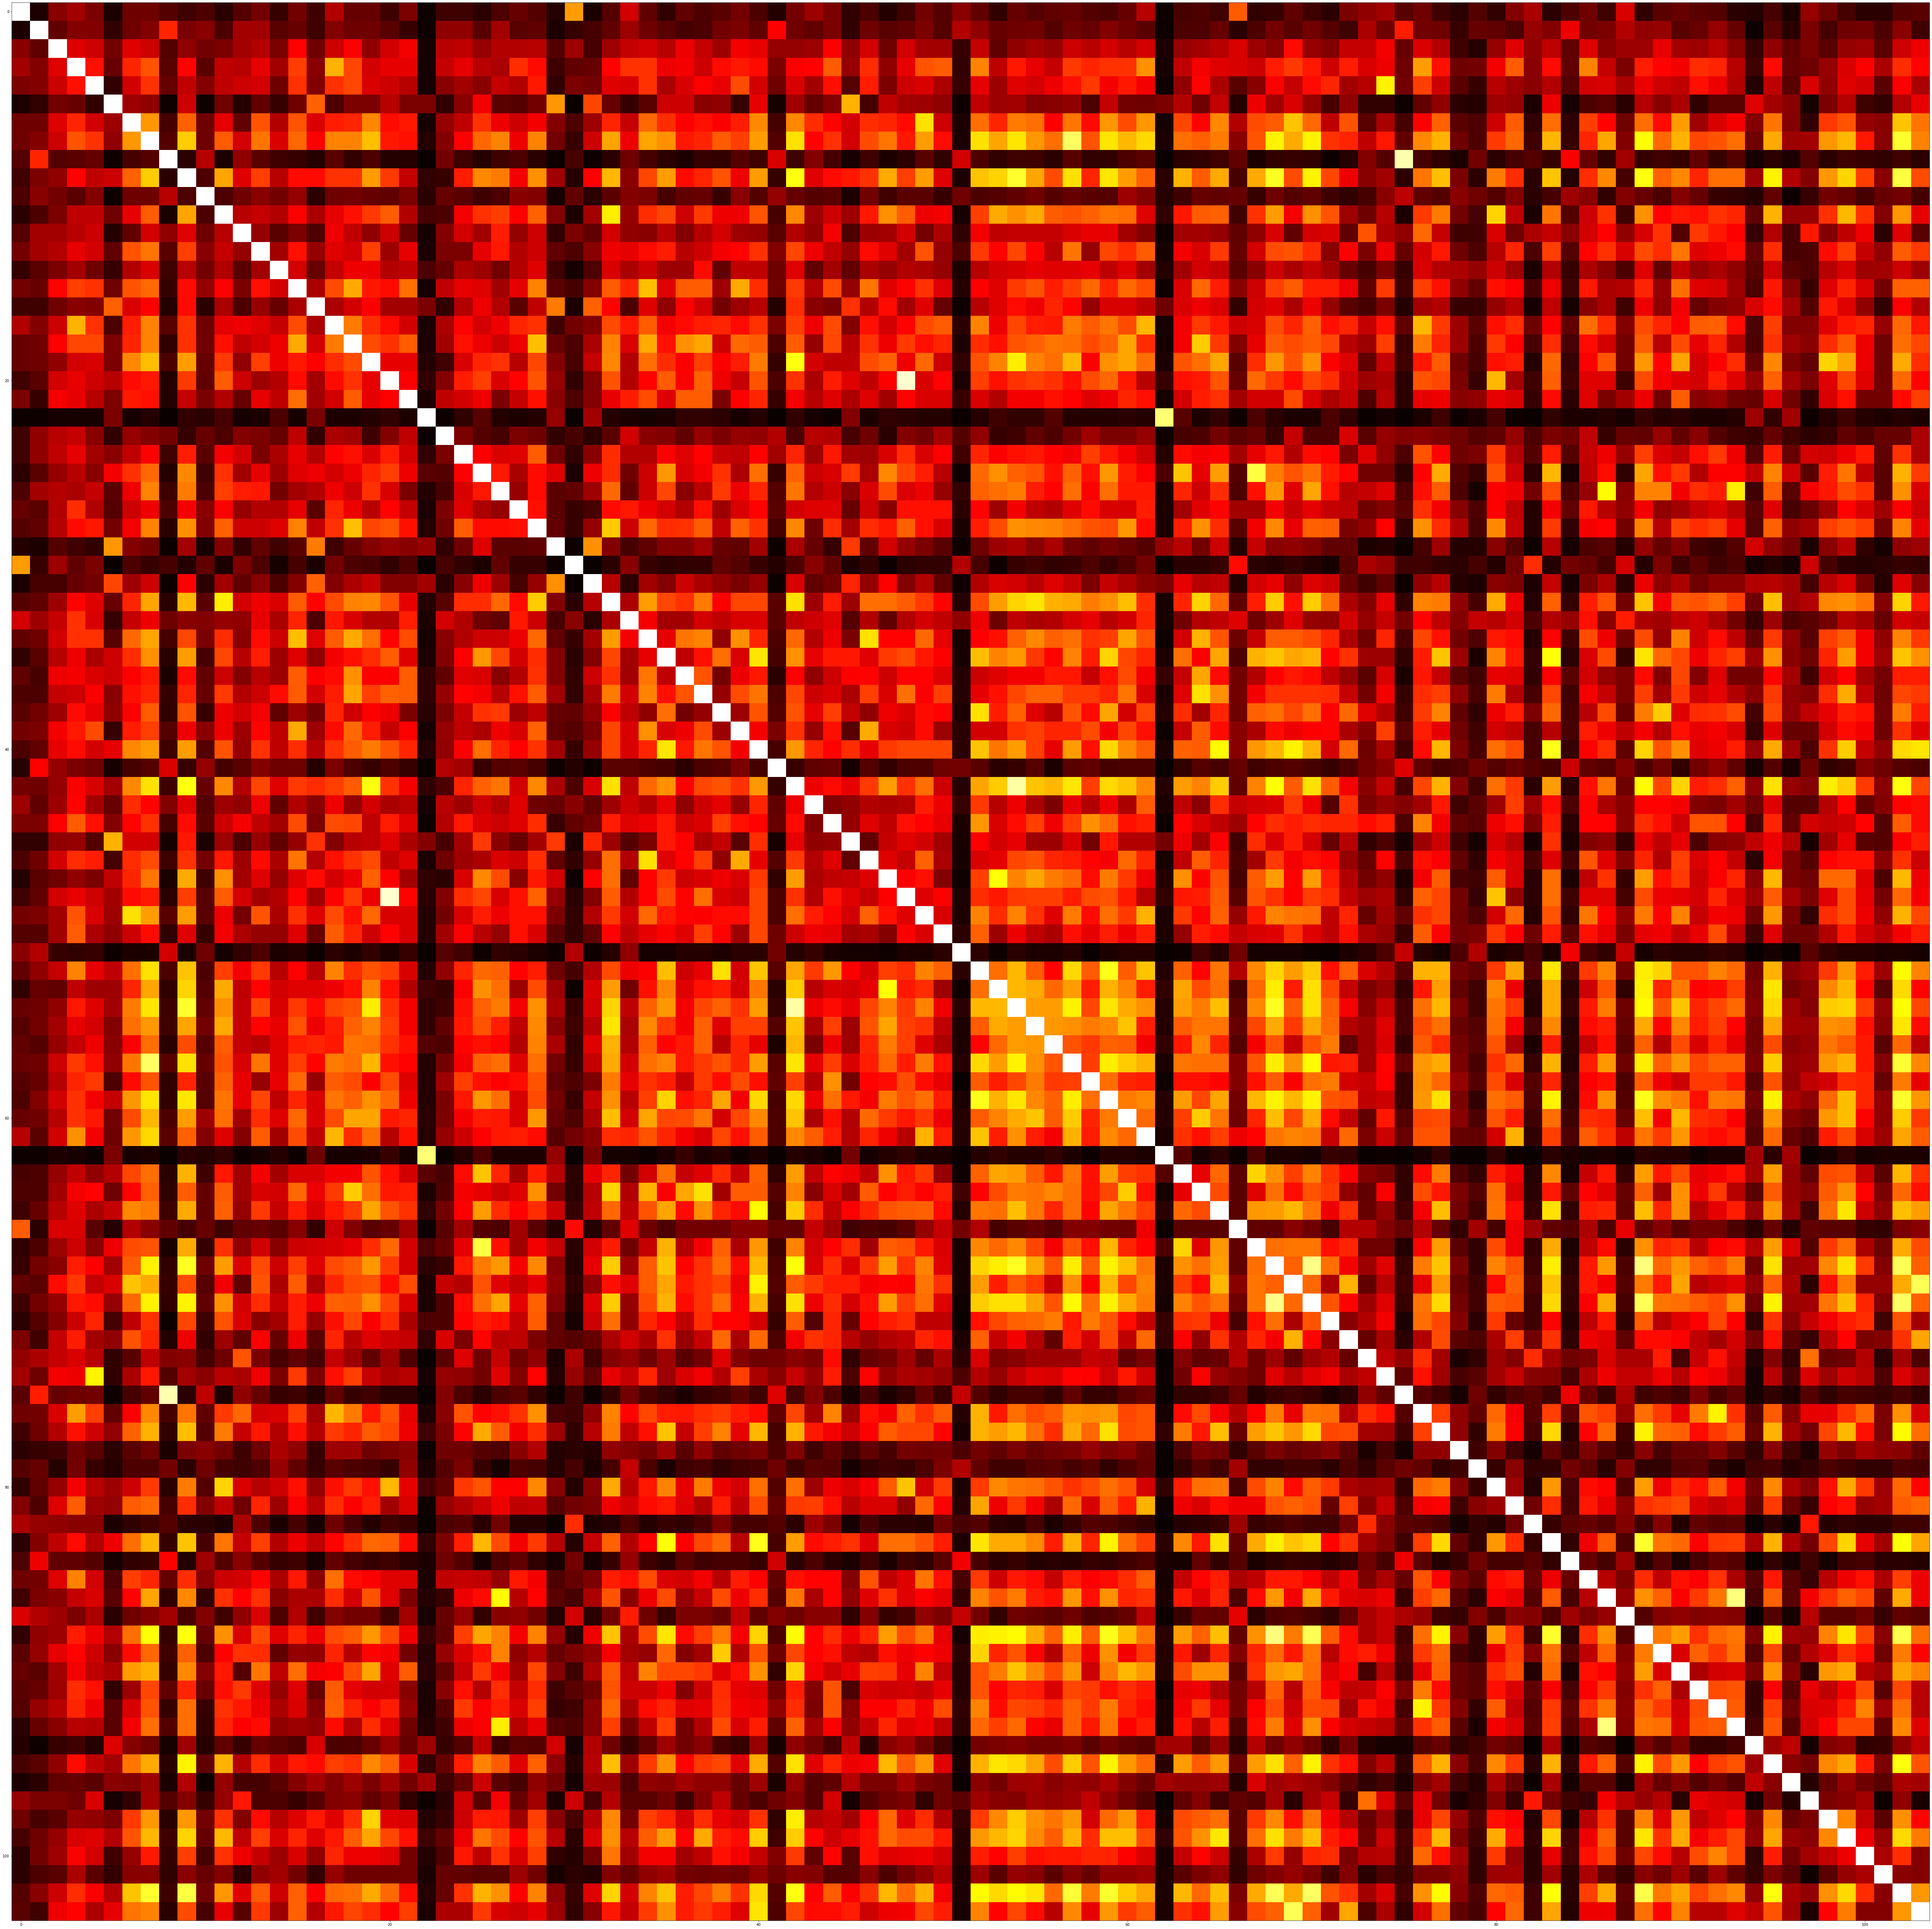

In [57]:
import matplotlib.pyplot as plt
import numpy as np

a = np.random.random((16, 16))
fig, ax = plt.subplots(figsize=(100, 100))
plt.imshow(proxMat, cmap='hot', interpolation='nearest')
plt.savefig('proximity_matrix.png')
plt.show()

<Figure size 432x288 with 0 Axes>

# Proximity Matrix (regression)

In [38]:
def prox_matrix(df, target, features, cluster_dimension,trees = 10):
    #https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm#prox

    #initialize datframe for independant variables
    independant = pd.DataFrame()

    #Handle Categoricals: This should really be added to RandomForestRegressor
    for column,data_type in df[features].dtypes.iteritems():       
        try:
            independant[column] = pd.to_numeric(df[column],downcast = 'integer')
        except ValueError:
            contains_nulls = df[column].isnull().values.any()
            dummies = pd.get_dummies(df[column],prefix=column,dummy_na=contains_nulls,drop_first=True)
            independant[dummies.columns] = dummies

    if len(independant.index) != len(df.index):
        raise Exception('independant variables not stored properly')

    #train Model    
    clf = RandomForestRegressor(n_estimators=trees, n_jobs=-1)
    clf.fit(independant, df[target])

    #Final leaf for each tree
    leaves = clf.apply(independant)
    #value in cluster dimension
    labels = df[cluster_dimension].values

    numerator_matrix = {}
    for i,value_i in enumerate(labels):
        for j,value_j in enumerate(labels):
            if i >= j:       
                numerator_matrix[(value_i,value_j)] = numerator_matrix.get((value_i,value_j), 0) + np.count_nonzero(leaves[i]==leaves[j])
                numerator_matrix[(value_j,value_i)] = numerator_matrix[(value_i,value_j)] 

    #normalize by the total number of possible matchnig leaves        
    prox_matrix = {key: 1.0 - float(x)/(trees*np.count_nonzero(labels==key[0])*np.count_nonzero(labels==key[1])) for key, x in numerator_matrix.iteritems()}                                                                  

    #make sorted dataframe                                                                                                                                                                                                                                                                
    levels = np.unique(labels)
    D = pd.DataFrame(data=[[ prox_matrix[(i,j)] for i in levels] for j in levels],index=levels,columns=levels)

    return D

In [ ]:
data= pd.read_csv('./dataset/johnwise_cleaned.csv')
data.columns

In [ ]:
y = data['toxic'].values
x_data = data.drop(["toxic"], axis=1)
x = (x_data-np.min(x_data))/(np.max(x_data) -np.min(x_data))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

In [ ]:
prox_matrix(df, target, features, cluster_dimension,trees = 10)